# Exercises for Vector Applications

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1

Let’s build an edge detector. The kernel for an edge detector is very simple: [−1 +1].
The dot product of that kernel with a snippet of a time series signal with constant value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep change (e.g., [1 10] would produce a dot product of 9).

The signal we’ll work with is
a plateau function. The graphs created in the code cell below will show you the kernel and the signal.

The first step in this exercise is to write code that creates these two time series. We did that for you:

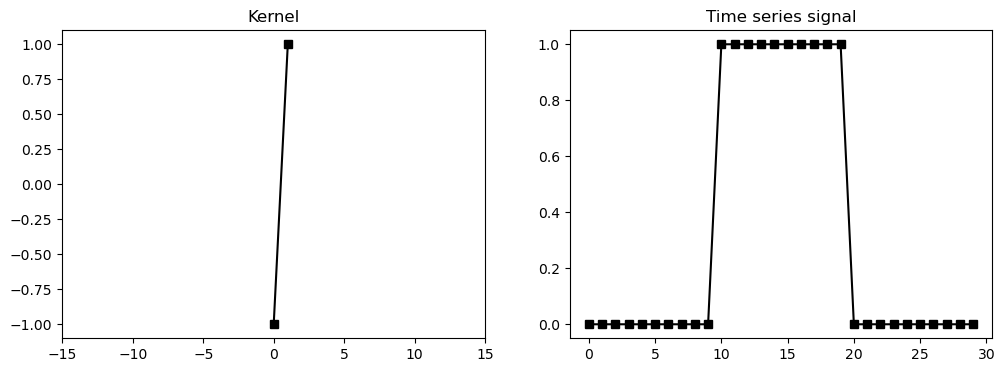

In [2]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')


plt.show()

Next, we write a for loop over the time points in the signal. At each time point, compute the dot product between the kernel and a segment of the time series data that has the same length as the kernel. You should produce a plot that looks like this one:

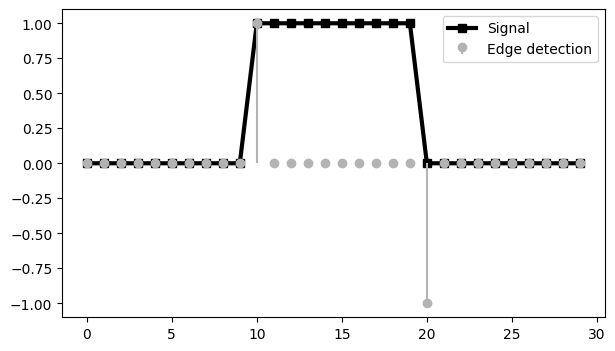.

(Focus more on the result than on the aesthetics.) Notice that our edge
detector returned 0 when the signal was flat, +1 when the signal jumped up, and −1 when the signal jumped down.

To solve the exercise change the code below...


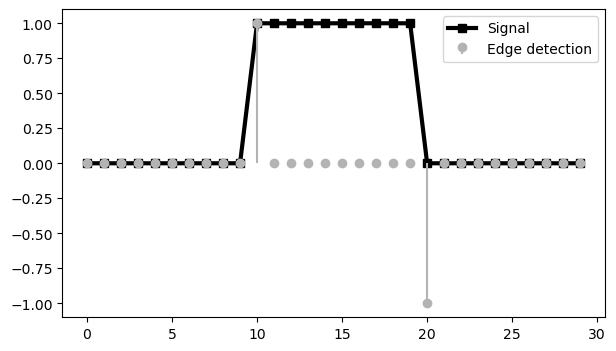

In [4]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching
for t in range(1,len(signal)-1):
  featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,1,figsize=(7,4))



axs.plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs.stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs.legend()
plt.show()

Feel free to continue exploring this code.

*   For example, does anything change if you pad the kernel with zeros ([0 −1 1 0])?

*   What about if you flip the kernel to be [1 −1]?

*   How about if the kernel is asymmetric ([−1 2])?

# Exercise 2

Now we will repeat the same procedure but with a different signal and kernel. The
goal will be to smooth a rugged time series. The time series will be 100 random
numbers generated from a Gaussian distribution (also called a normal distribution).
The kernel will be a bell-shaped function that approximates a Gaussian function,
defined as the numbers [0, .1, .3, .8, 1, .8, .3, .1, 0] but scaled so that the sum over
the kernel is 1. Your kernel should match graph A in Figure 4-6, although your signal
won't look exactly like graph B due to random numbers.



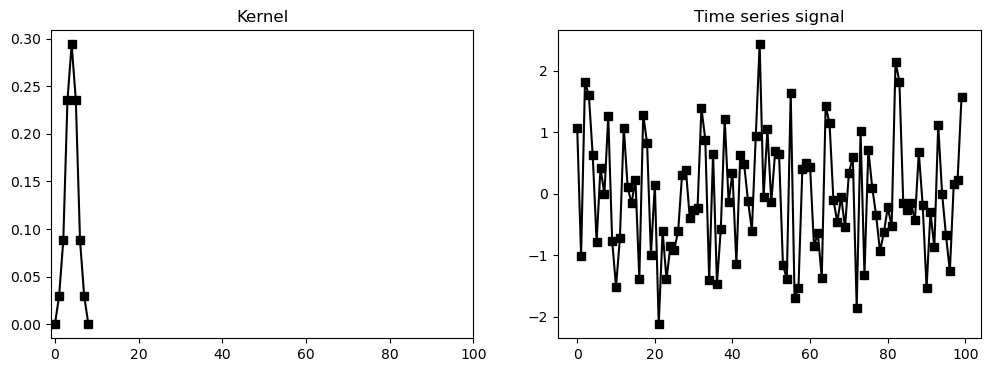

In [5]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')


plt.show()



Copy and adapt the code from the previous exercise to compute the sliding time series of dot products—the signal filtered by the Gaussian kernel. Warning: be mindful of the indexing in the for loop. You should obtain the following as a result:

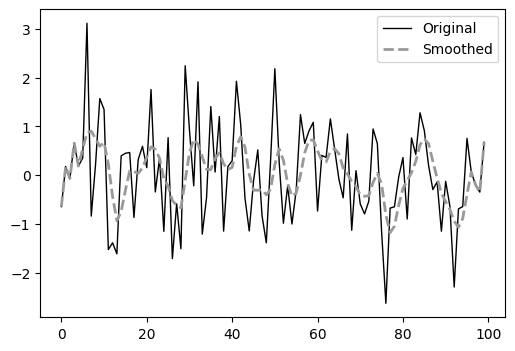

You can see that the filtered signal is a smoothed version of the original signal. This is also called low-pass filtering.

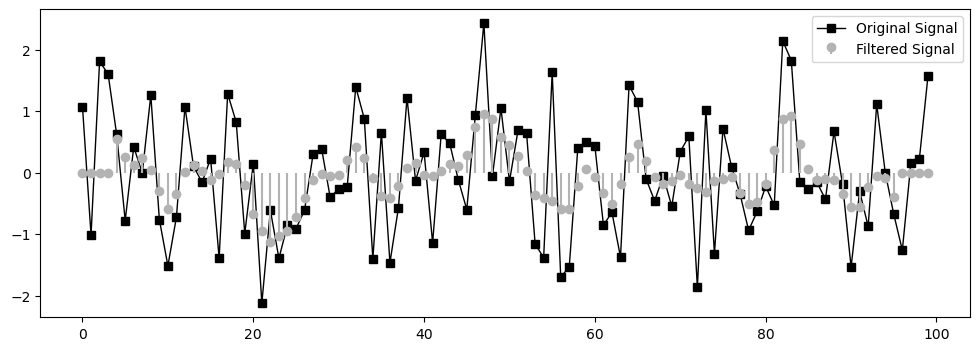

In [7]:
# Your solution here
featureMap = np.zeros(len(timeseries))

for i in range(halfKrn, Nsignal-halfKrn):
    featureMap[i] = np.dot(kernel, timeseries[i-halfKrn:i+halfKrn+1])

# plot the result
_, axs = plt.subplots(1, 1, figsize=(12, 4))

axs.plot(timeseries, 'ks-', label='Original Signal', linewidth=1)
markers, stemlines, _ = axs.stem(range(len(featureMap)), featureMap,
                                 basefmt=' ', linefmt='', markerfmt='o',
                                 label='Filtered Signal')

plt.setp(stemlines, 'color', [.7, .7, .7])
plt.setp(markers, 'color', [.7, .7, .7])

axs.legend()
plt.show()

# Exercise 3

Replace the 1 in the center of the kernel with −1 and mean center the kernel.
Then rerun the filtering and plotting code. What is the result? It actually accentuates the sharp features! In fact, this kernel is now a high-pass filter, meaning it
dampens the smooth (low-frequency) features and highlights the rapidly changing
(high-frequency) features.


# Exercise 4

In k-Means, one way to determine an optimal k is to repeat the clustering multiple times (each
time using randomly initialized cluster centroids) and assess whether the final clustering is the same or different.  The following code cell prepares a sample of data for your experiments...

In [ ]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()



In the following we provide you a k-means implementation

In [ ]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(1,4,figsize=(12,3))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):

  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])



plt.show()


In the following code, we are able to rerun the k-means code
several times using to see whether the resulting clusters are similar (this is a
qualitative assessment based on visual inspection).  

Notice we do not generate new data, we just run k-means with different initial random centroids...


Can you change the code to run 5 iterations?


In [ ]:
def runkMeans(n) :

  ## initialize random cluster centroids
  k = 3 # extract three clusters




  # setup the figure
  fig,axs = plt.subplots(n,4,figsize=(12,3*n))
  axs = axs.flatten()
  lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'

  for j in range(n) :
      # random cluster centers (randomly sampled data points)
      ridx = np.random.choice(range(len(data)),k,replace=False)
      centroids = data[ridx,:]

      # plot data with initial random cluster centroids
      axs[j*4].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
      axs[j*4].plot(centroids[:,0],centroids[:,1],'ko')
      axs[j*4].set_title('Iteration 0')
      axs[j*4].set_xticks([])
      axs[j*4].set_yticks([])

      # loop over iterations
      for iteri in range(3):
        # step 1: compute distances
        dists = np.zeros((data.shape[0],k))
        for ci in range(k):
          dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

        # step 2: assign to group based on minimum distance
        groupidx = np.argmin(dists,axis=1)

        # step 3: recompute centers
        for ki in range(k):
          centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


        # plot data points
        for i in range(len(data)):
          axs[j*4+iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
          axs[j*4+iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
          axs[j*4+iteri+1].set_title(f'Run {j} Iteration {iteri+1}')
          axs[j*4+iteri+1].set_xticks([])
          axs[j*4+iteri+1].set_yticks([])



  plt.show()

runkMeans(3)

Do the final cluster assignments generally seem similar even though the centroids are randomly selected?

Dit it improve if you run 5 iterations?

# Exercise 5


Repeat the multiple clusterings using k = 2 and k = 4. What do you think of these results?

# Exercise 6

Write a Python function that takes two vectors as input and provides two numbers as output:
*   the Pearson correlation coefficient and
*   the cosine similarity value.

Write code
that follows the formulas presented in the class; don’t simply call np.corrcoef and spatial.distance.cosine.

Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.

